In [26]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [27]:
train_path = './data/train.csv'
test_path = './data/test.csv'
store_path = './data/store.csv'

#loading datasets

train = pd.read_csv(train_path, parse_dates=['Date'])
test = pd.read_csv(test_path, parse_dates=['Date'])
store = pd.read_csv(store_path)
print(train.shape,test.shape,store.shape)


(1017209, 9) (41088, 8) (1115, 10)


In [28]:
print(train.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [29]:
print(train.tail())

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  


In [30]:
train.info()
# i got each and everything about the dataset like null values datatypes and non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [31]:
print(train.isnull().sum())
print(train.duplicated().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
0


In [32]:
train.describe().round(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.0,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,2014-04-11 01:30:42.846061824,5773.82,633.15,0.83,0.38,0.18
min,1.00,1.0,2013-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.0,2013-08-17 00:00:00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.0,2014-04-02 00:00:00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.0,2014-12-12 00:00:00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.0,2015-07-31 00:00:00,41551.00,7388.00,1.00,1.00,1.00
std,321.91,2.0,NaN,3849.93,464.41,0.38,0.49,0.38


SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64


<Axes: xlabel='SchoolHoliday', ylabel='count'>

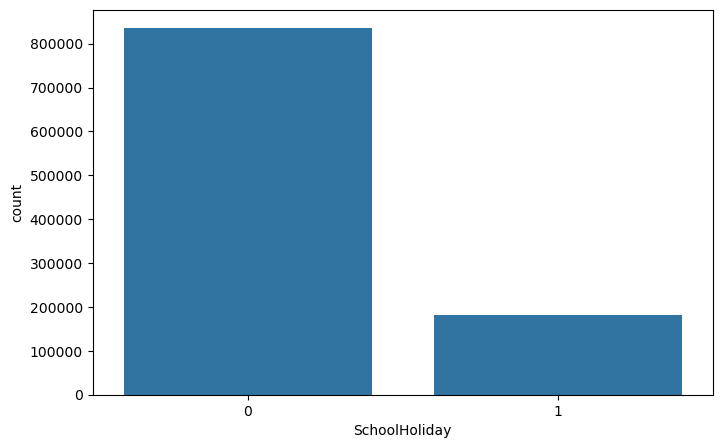

In [33]:
print(train.SchoolHoliday.value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='SchoolHoliday',data=train)

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64


<Axes: xlabel='StateHoliday', ylabel='count'>

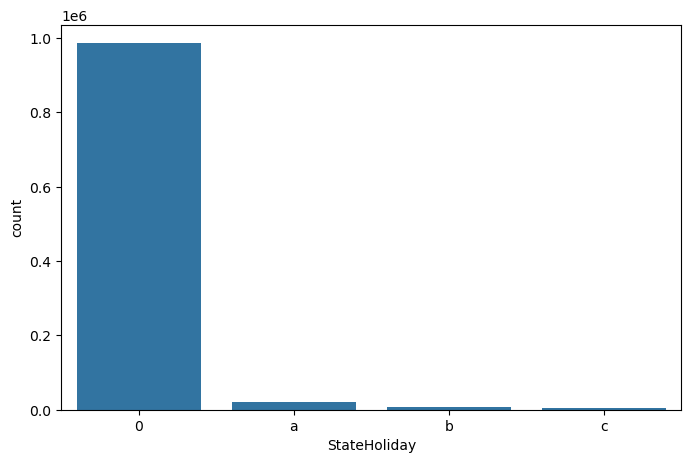

In [34]:
#now checking state holiday
print(train.StateHoliday.value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='StateHoliday',data=train)


In [35]:
#finding how many unique values are there in each column
train.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [36]:
#what is the duration of the dataset
print("Train data from {} to {}".format(train.Date.min(),train.Date.max()))
print("Test data from {} to {}".format(test.Date.min(),test.Date.max()))

Train data from 2013-01-01 00:00:00 to 2015-07-31 00:00:00
Test data from 2015-08-01 00:00:00 to 2015-09-17 00:00:00


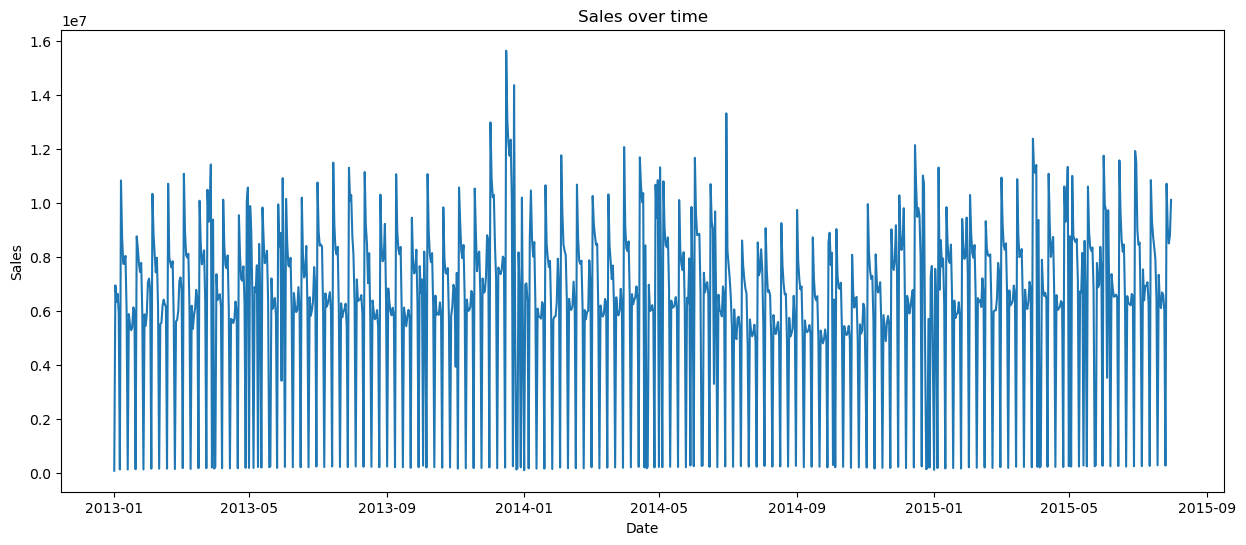

In [48]:
# can i print the sales graph with respect to date 
plt.figure(figsize=(15,6))
plt.plot(train.groupby('Date')['Sales'].sum())
plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales') 
plt.show()


Irregular pattern


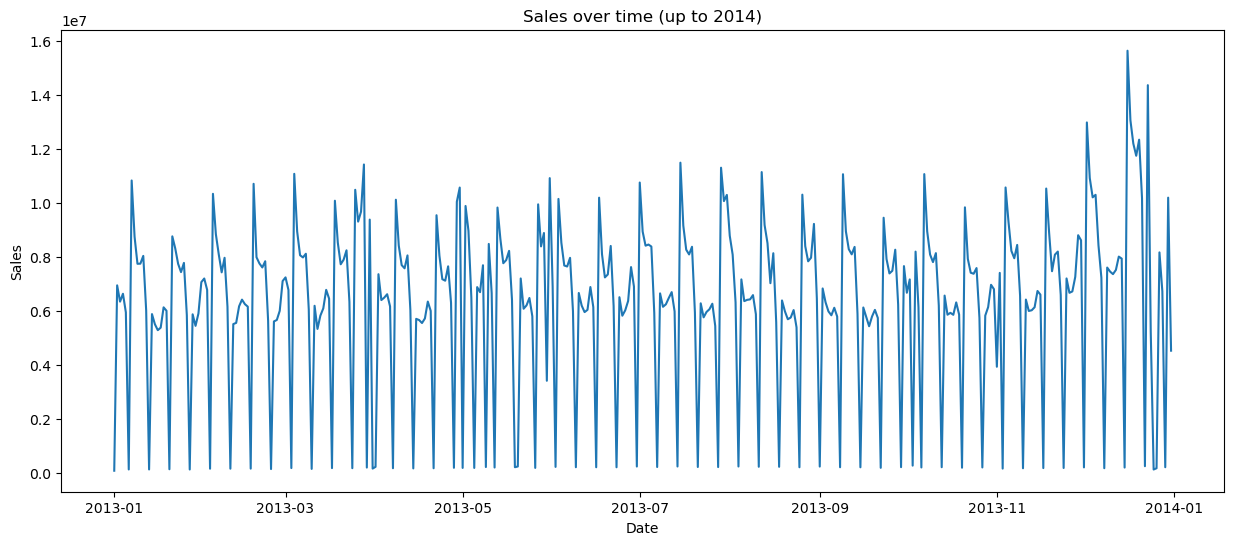

In [49]:
#trying for one year
plt.figure(figsize=(15,6))
plt.plot(train[train['Date']<'2014-01-01'].groupby('Date')['Sales'].sum())
plt.title('Sales over time (up to 2014)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


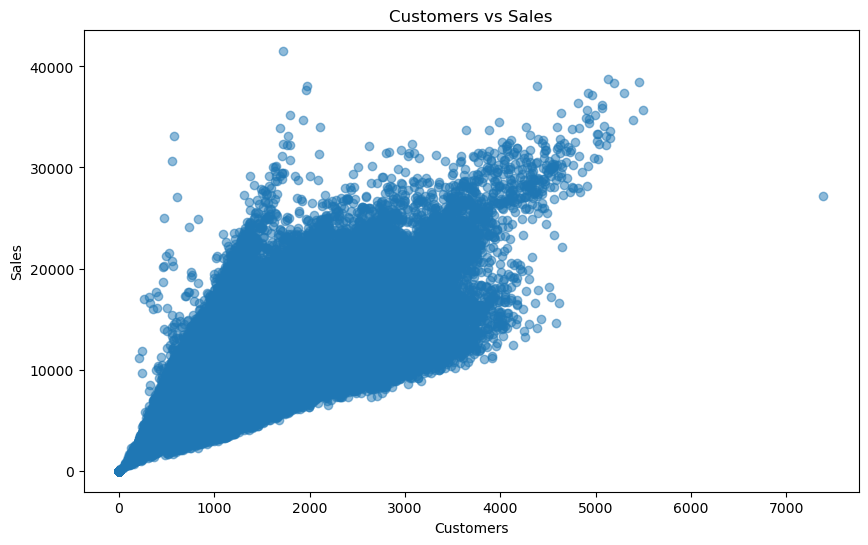

In [50]:
#trying to find the relation between customers and sales
plt.figure(figsize=(10,6))
plt.scatter(train['Customers'],train['Sales'],alpha=0.5)
plt.title('Customers vs Sales')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show(
    
)

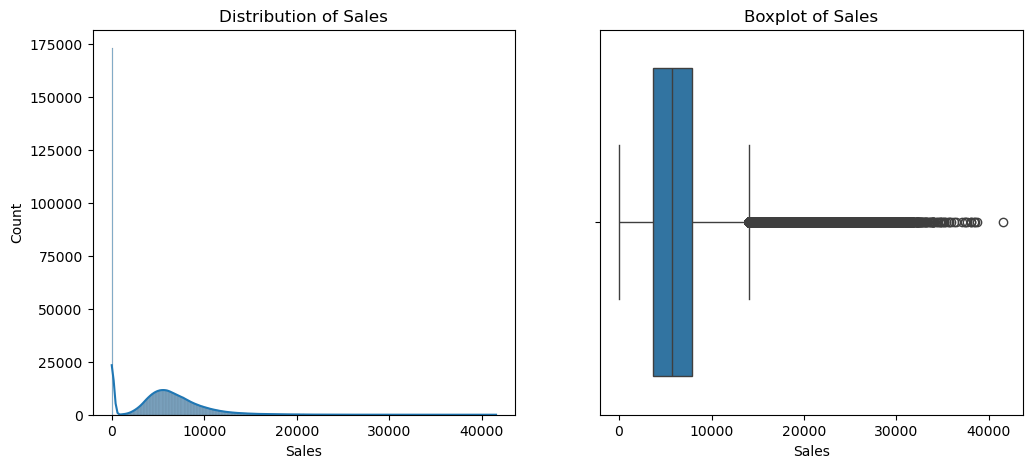

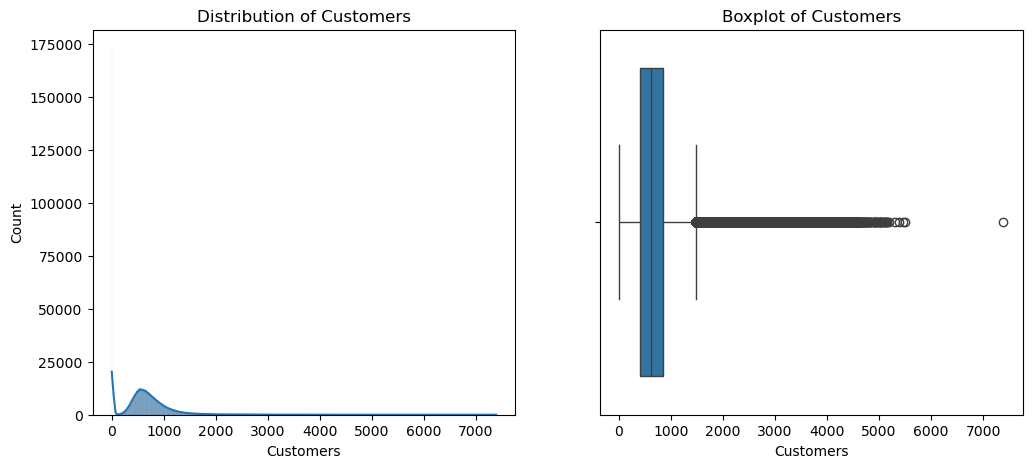

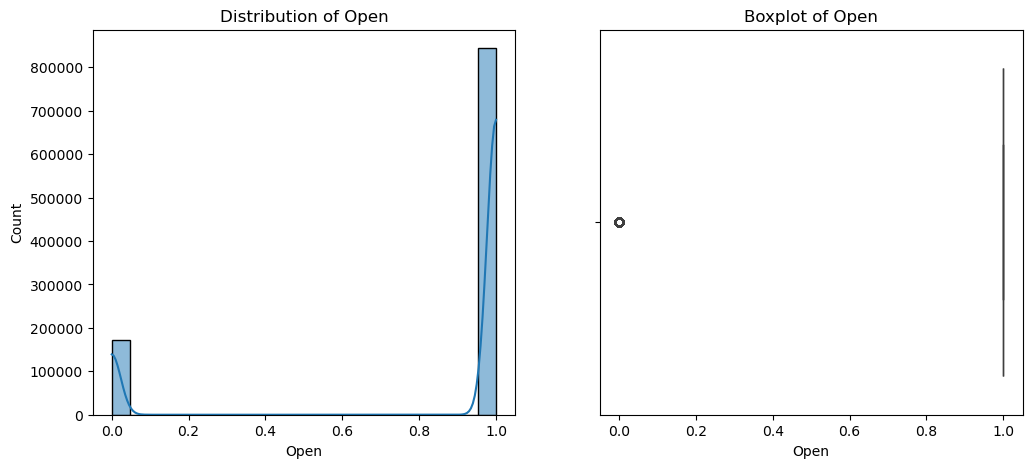

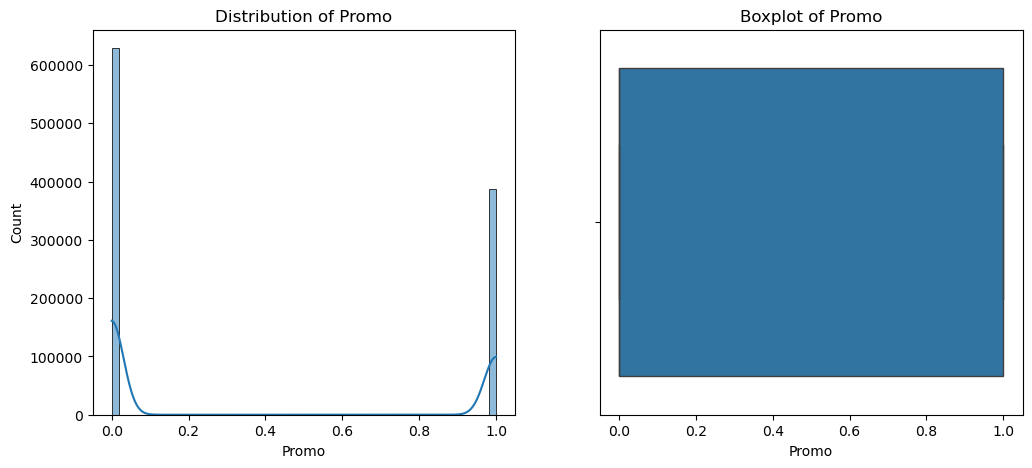

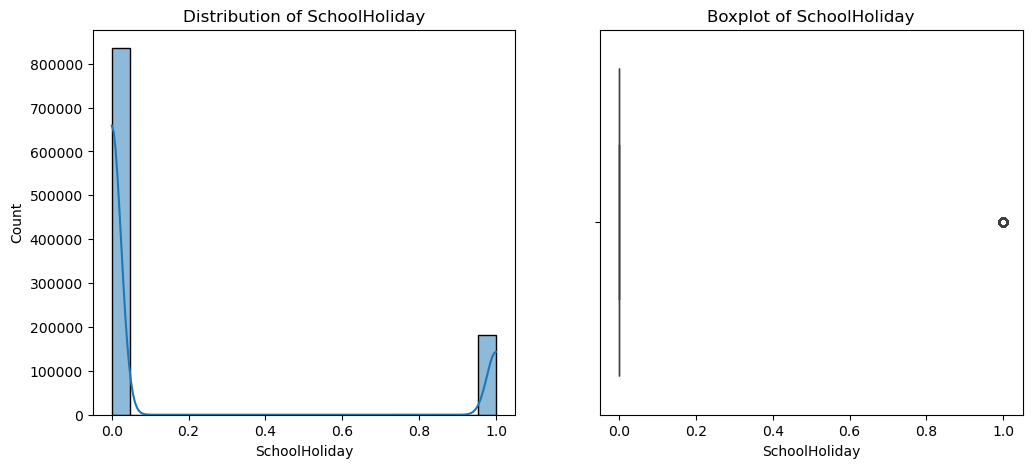

In [51]:
#trying the check the normality for each and every column
def plot_distribution(column):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(train[column],kde=True)
    plt.title(f'Distribution of {column}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=train[column])
    plt.title(f'Boxplot of {column}')
    
    plt.show()
for col in ['Sales','Customers','Open','Promo','SchoolHoliday']:
    plot_distribution(col)

It needs fixing 


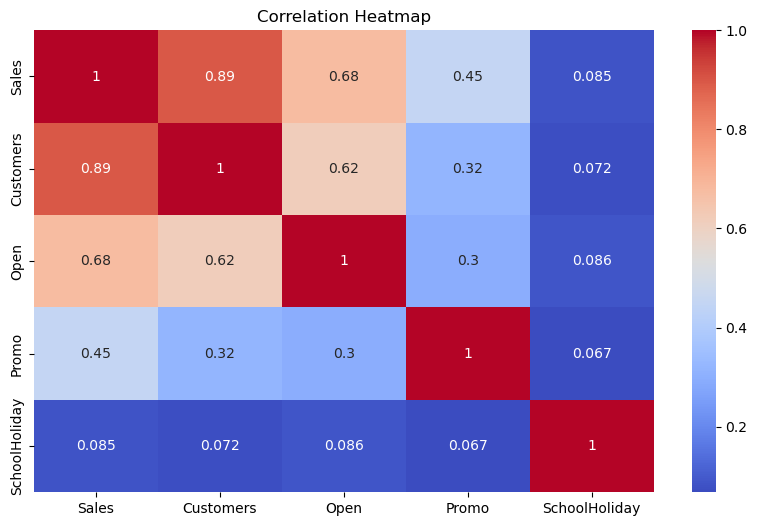

In [54]:
#trying to find the realtion with each and every column with correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

cols = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']
sns.heatmap(train[cols].corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

# a lot of positive correlation
plt.show()

In [61]:
#transforming date column to extract more features
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month 
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.isocalendar().week
train['DayOfWeek'] = train['Date'].dt.dayofweek

In [62]:
print(train.head())
# sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4 2015-07-31   5263        555     1      1            0   
1      2          4 2015-07-31   6064        625     1      1            0   
2      3          4 2015-07-31   8314        821     1      1            0   
3      4          4 2015-07-31  13995       1498     1      1            0   
4      5          4 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  
0              1  2015      7   31          31  
1              1  2015      7   31          31  
2              1  2015      7   31          31  
3              1  2015      7   31          31  
4              1  2015      7   31          31  


<Axes: xlabel='DayOfWeek', ylabel='count'>

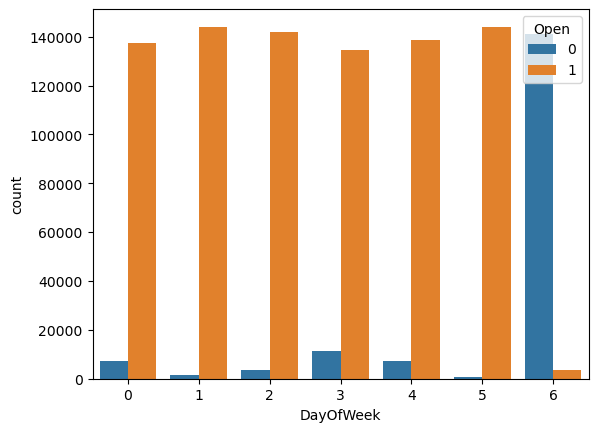

In [63]:
#now checking how many days store is open and closed
sns.countplot(x = 'DayOfWeek',hue='Open',data=train)

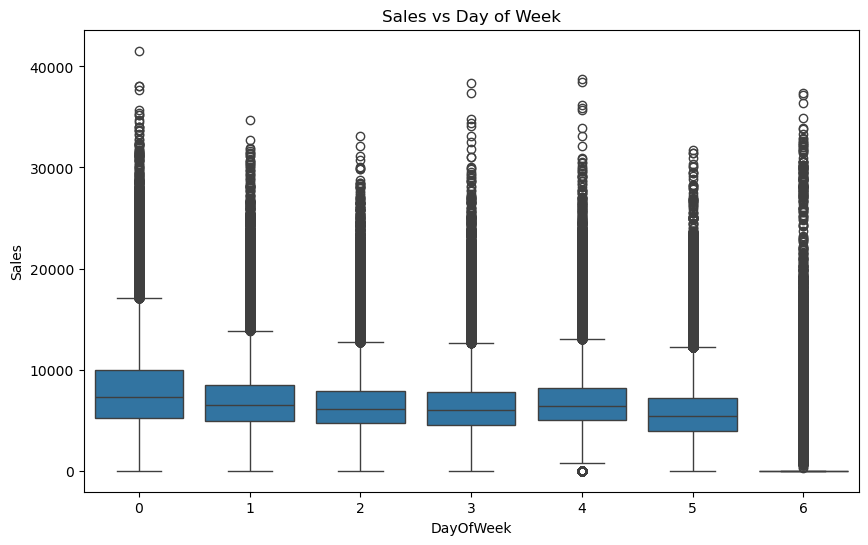

In [64]:
#now checking is there any relation between sales and day of week
plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek',y='Sales',data=train)
plt.title('Sales vs Day of Week')
plt.show()


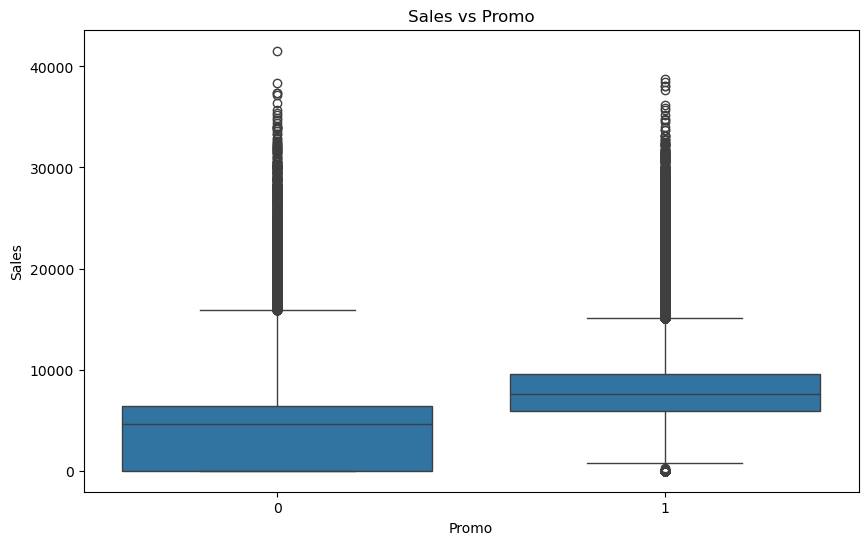

In [65]:
#promotion vs sales
plt.figure(figsize=(10,6))
sns.boxplot(x='Promo',y='Sales',data=train)
plt.title('Sales vs Promo')
plt.show()

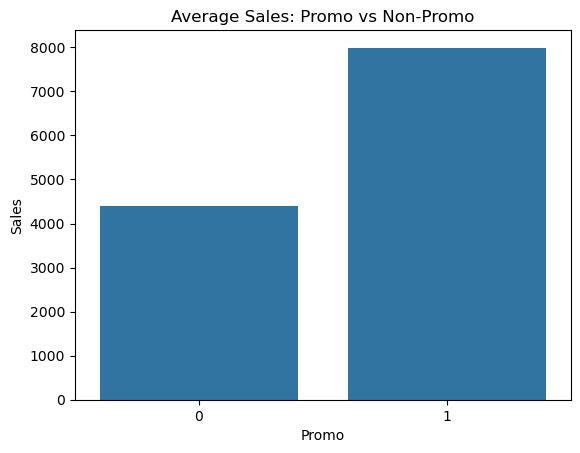

In [66]:
#finding how much sales increased on promo
avg_sales = train.groupby('Promo')['Sales'].mean().reset_index()
sns.barplot(data=avg_sales, x='Promo', y='Sales')
plt.title('Average Sales: Promo vs Non-Promo')
plt.show()

plt.show()

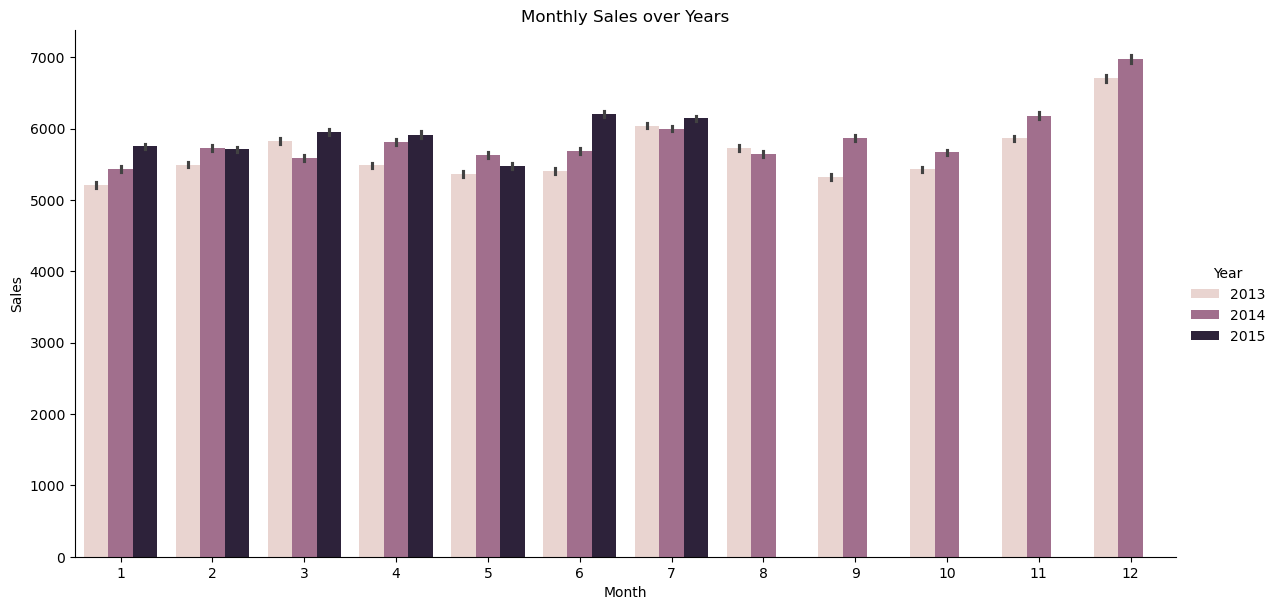

In [67]:
#plotting the graph of sales on months on every year
sns.catplot(
    x='Month',
    y='Sales',
    data=train,
    kind='bar',
    hue='Year',
    height=6,
    aspect=2
)

plt.title('Monthly Sales over Years')
plt.show()


Last shows some growth but can be ignored


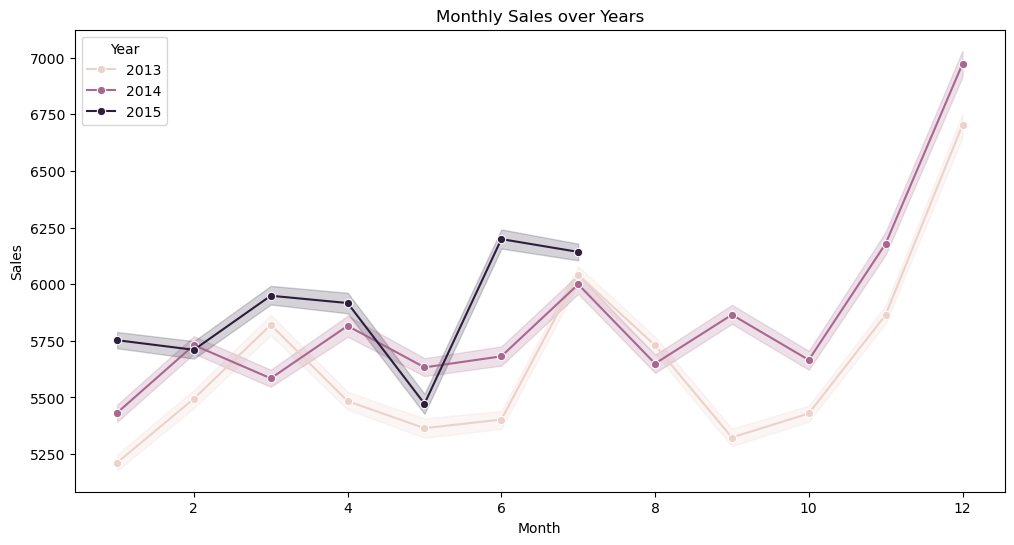

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    x='Month',
    y='Sales',
    data=train,
    hue='Year',
    marker='o'
)

plt.title('Monthly Sales over Years')
plt.show()


Now the picture is clear that last  month increases the number of sales

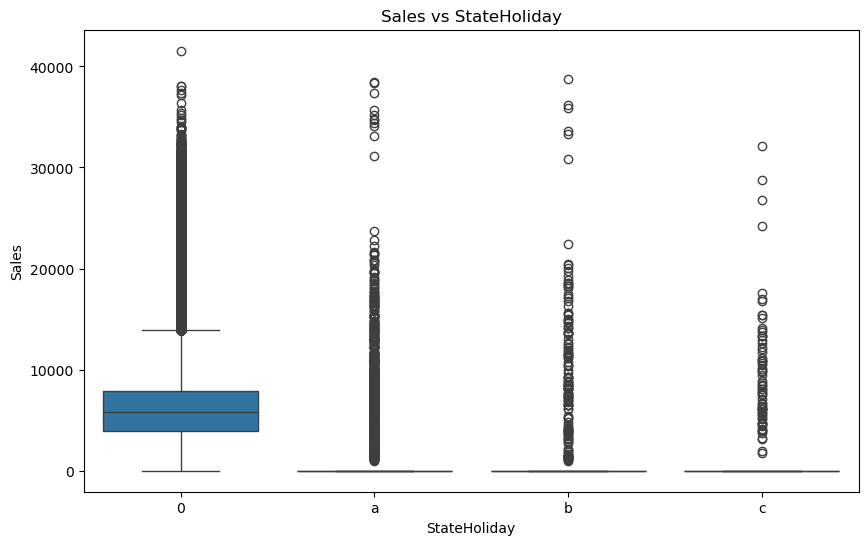

In [ ]:
#outliers are present in most of the columns
#checking if holidays are impacting sales or not
plt.figure(figsize=(10,6))
sns.boxplot(x='StateHoliday',y='Sales',data=train)
plt.title('Sales vs StateHoliday')
plt.show()

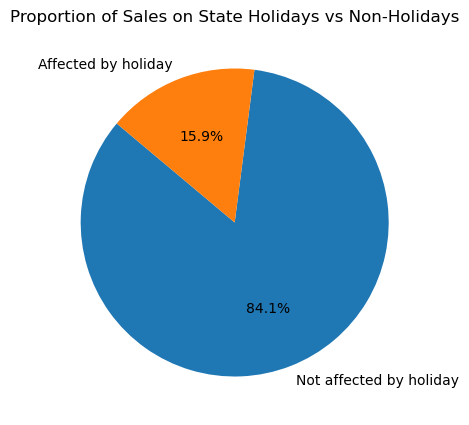

In [ ]:
#using counts
holiday = train['StateHoliday'] != '0'
counts = holiday.value_counts()

labels = ['Not affected by holiday', 'Affected by holiday']

plt.figure(figsize=(8,5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sales on State Holidays vs Non-Holidays')
plt.show()


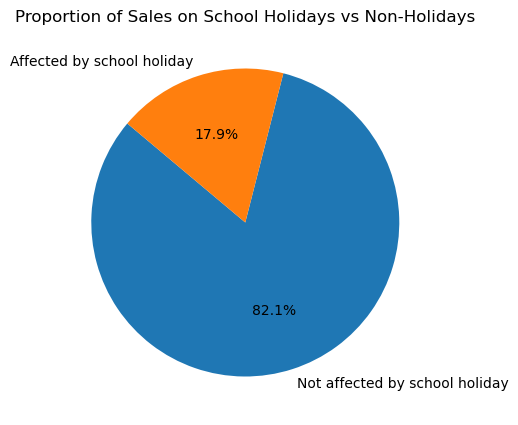

In [ ]:
labels = ['Not affected by school holiday', 'Affected by school holiday']
counts = train['SchoolHoliday'].value_counts()

plt.figure(figsize=(8,5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sales on School Holidays vs Non-Holidays')
plt.show()


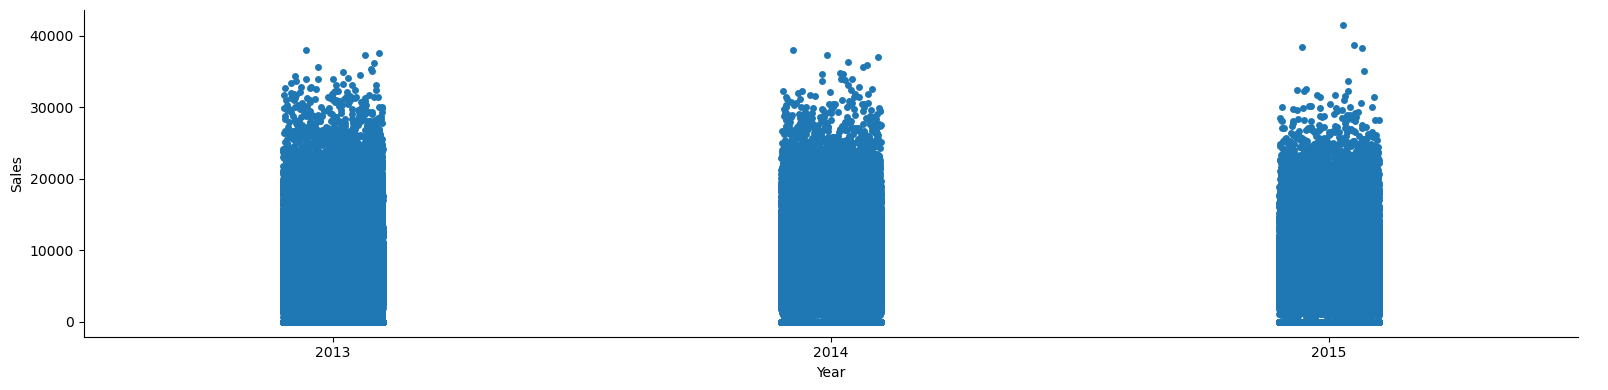

In [68]:

sns.catplot(x='Year',y='Sales',data=train, height=4, aspect=4 )

Not much difference in the sales 